# <center>Математика для нейронных сетей
## <center>NumPy

In [2]:
import numpy as np

Используя `np.dot()`, напишите функцию `calc_kxb`, которая принимает на вход $k, b, x$ и возвращает результат операции $sum(k*x)+b$ для трёхмерного массива.



In [7]:
def calc_kxb(k, x, b):
    return np.sum(k @ x) + b
k = np.array([1, 5, 10])
x = np.array([1,2,3])
b = 3
calc_kxb(k,x,b)

44

## <center>Линейные модели

In [8]:
from sklearn.linear_model import LinearRegression

In [11]:
X = np.array([1, -1, 3]).reshape(-1, 1)
y = np.array([7, 0, 14]).reshape(-1, 1)
model = LinearRegression().fit(X, y)
model.coef_, model.intercept_

(array([[3.5]]), array([3.5]))

## Суть градиентного спуска
>**Градиентный спуск** — метод нахождения локального минимума или максимума функции с помощью градиента.

Градиент функции $F(t,x,y,z,\dots)$ представляет собой вектор из частных производных по всем переменным:

$$ \nabla F = \Big(\frac{\partial F}{\partial t}, \frac{\partial F}{\partial x}, \frac{\partial F}{\partial y}, \frac{\partial F}{\partial z}\Big) $$

Его замечательное свойство заключается в том, что он указывает на локальный максимум функции из заданной точки. Иными словами, он показывает туда, где **функция быстрее всего растёт**.

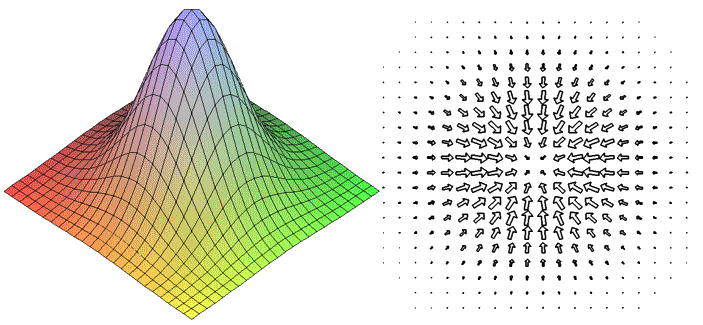

Это значит, что, «двигаясь» в сторону градиента, мы приближаемся к максимуму функции.

Также, используя антиградиент, мы можем найти локальный минимум.

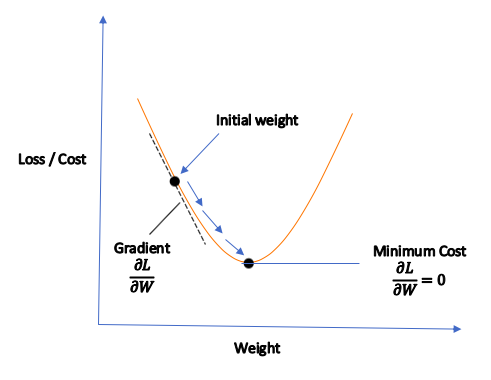

In [12]:
import sympy as sp

Задание 4.3  
Найти градиент функции в точках $(2, \frac{1}{3}, 0)$

In [13]:
x, y, z = sp.symbols('x y z')
F = 5*x**3 + (3 / y**2) + sp.sin(z)
F

5*x**3 + sin(z) + 3/y**2

In [19]:
gradF_x = F.diff(x)
gradF_y = F.diff(y)
gradF_z = F.diff(z)
gradF = sp.Matrix([gradF_x, gradF_y, gradF_z])
gradF

Matrix([
[15*x**2],
[-6/y**3],
[ cos(z)]])

In [24]:
gradF.subs(x, 2).subs(y, 1/3).subs(z, 0)

Matrix([
[    60],
[-162.0],
[     1]])

Задание 4.4  
Найти градиент функции в точках $(1, 2, 0)$

In [25]:
F = x*y + y*z**2 + sp.cos(z)*x**(-1)
F

x*y + y*z**2 + cos(z)/x

In [26]:
gradF = sp.Matrix([F.diff(x), F.diff(y), F.diff(z)])
gradF

Matrix([
[ y - cos(z)/x**2],
[        x + z**2],
[2*y*z - sin(z)/x]])

In [28]:
gradF.subs(x, 1).subs(y, 2).subs(z, 0)

Matrix([
[1],
[1],
[0]])

Задание 4.5  
Найти градиент функции в точках $(5, 10)$

In [29]:
F = x + 2*y
gradF = sp.Matrix([F.diff(x), F.diff(y)])
gradF

Matrix([
[1],
[2]])

Задание 4.6  
Найти градиент функции в точках $(5, 10)$

In [30]:
F = y * F
F

y*(x + 2*y)

In [31]:
gradF = sp.Matrix([F.diff(x), F.diff(y)])
gradF

Matrix([
[      y],
[x + 4*y]])

In [32]:
gradF.subs(x, 5).subs(y, 10)

Matrix([
[10],
[45]])

## <center>Функции потерь
Функции потерь $L$ зависит от $\hat{y}$ и $y$, где $\hat{y}$ — предсказание сети, а $y$ — целевая переменная.

Эта функция характеризует то, насколько плохо или хорошо наша модель предсказывает ожидаемое поведение. В общем случае это некоторая разность между тем, что мы получили от модели, и тем, что должны были получить на самом деле.

Её выбирают так, чтобы она была **неотрицательная** и **дифференцируемая**, то есть для неё должны существовать производные по параметрам на всей числовой прямой или за исключением некоторых точек, в которых мы можем её доопределить руками, для того чтобы можно было применить к ней градиентный спуск.

Нас интересует значение функции потерь 0: оно говорит о том, что модель работает идеально, но на практике оно редко достижимо, поэтому мы ищем максимально близкое к нему значение — **глобальный минимум**.

Эта функция формирует **поверхность потерь**, как правило, сложную, с большим количеством вершин и впадин — локальных максимумов и минимумов. А градиентный спуск — это метод, который приведёт нас в один из локальных минимумов.

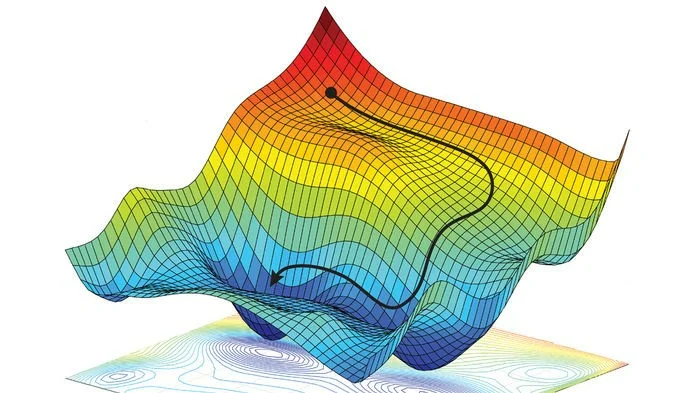

MSE подходит для задач регрессии

$$ MSE = \frac{1}{N} \sum_{i=1}^N (\hat{y} - y)^2 $$

Задание 5.1  
Посчитайте $MSE$

In [35]:
y_true = np.array([1, 4, 7, 13])
y_pred = np.array([0, 5, 10, 20])
MSE = np.sum(np.power([y_true - y_pred], 2)) / y_true.shape[0]
MSE

15.0

### BCE (BINARY CROSS ENTROPY)
Если предыдущая функция потерь хорошо подходила для задач регрессии, то должны быть и такие, которые хорошо подходят для классификации, не так ли?

Cross Entropy:
$$ CE = - \sum_x p(x) \times \log(q(x)) $$
Перед нами формула перекрёстной энтропии для любого количества классов, здесь $p(x)$ — настоящее распределение вероятностей, а $q(x)$ — предсказанное.

Нас интересует частный случай этой формулы, когда количество классов равно двум — целевой класс и шум, то есть всё остальное. Такая функция потерь называется **Binary Cross Entropy**.

$$ BCE = - \frac{1}{N} \sum_{i=1}^N [y_i \times \log(p(\hat{y_i})) + (1-y_i) \times \log(1 - p(\hat{y_i}))] $$

Представим, что наша модель выдаёт одно число от 0 до 1 — вероятность принадлежности объекта к целевому классу 1, назовём её $p(\hat{y})$. Если это число близко к 1, мы считаем, что перед нами представитель класса 1, если число близко к 0, то класс 0.

Формула визуально разбивается на два слагаемых

$$ y_i \times \log(p(\hat{y_i})) $$
$$ (1-y_i) \times \log(1 - p(\hat{y_i})) $$

Первое слагаемое может быть **не** равно нулю в случае, если целевой класс равен единице, то есть штрафует за неправильное предсказание первого класса. Второе слагаемое, наоборот, может быть **не** равно нулю при $y=0$, то есть штрафует за то, насколько наша вероятность далека от 0.

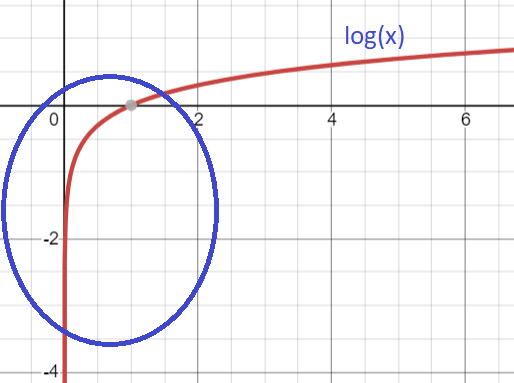

Так как наше предсказание принимает значение от 0 до 1, то и логарифм будет принимать отрицательные значения, поэтому в начале формулы стоит минус, чтобы мы получали всегда неотрицательное значение.



## <center>Обучение линейной регрессии
Давайте возьмём всё ту же MSE и посчитаем её производную от $w$ и от $b$, при этом вспомним, что $\hat{y}$ — это $W \times x + b$:
$$ \hat{y} = W \times x + b $$
Выглядят наши производные вот так:
$$ \frac{\partial MSE}{\partial w} = 2 (\hat{y} - y) \times x $$
$$ \frac{\partial MSE}{\partial b} = 2 (\hat{y} - y) \times 1 $$
Здесь можно заметить, что производная по $b$ почти не отличается от $w$: нужно только принять $x_i$ за 1. Это позволяет нам считать в коде производные разом: для этого нам нужно заменить $w$ и $b$ на одну только $w$, но с дополнительной строкой коэффициентов $b$, и добавить в $x$ такую же строку единиц.
$$ W_{new}=\begin{pmatrix}W \\ B \end{pmatrix} $$
$$ X_{new}=\begin{pmatrix}X \\ 1 \end{pmatrix} $$

## <center>От линейной регрессии к нейрону
Начнём с простого — реализуем всего один нейрон:

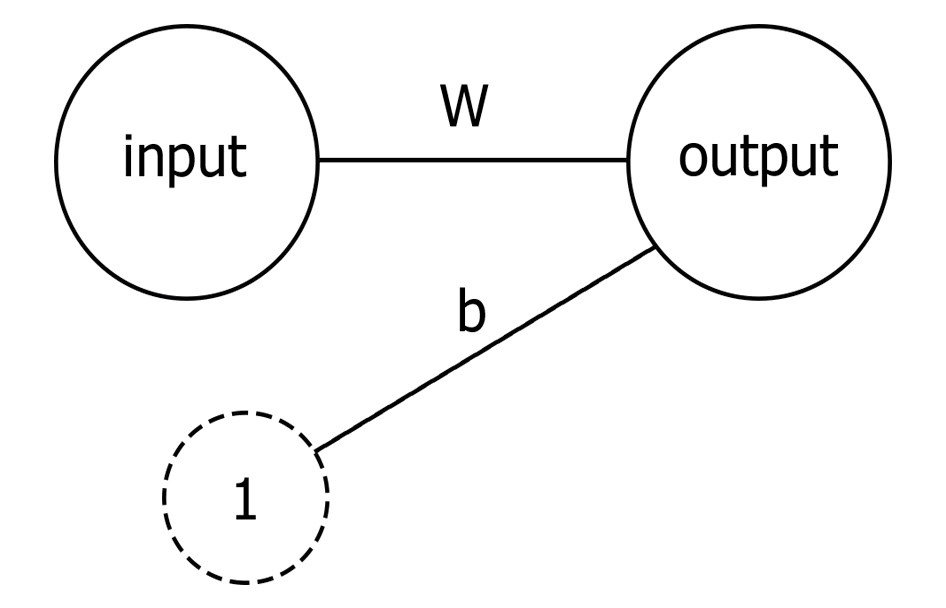

У него есть **веса**, обозначаемые обычно буквой $W$ (*weights*), и **коэффициент сдвига**, который обозначают $b$ (*bias*).

Приходящий в него сигнал домножается на вес $W$, и потом к нему прибавляется сдвиг.